# Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Link : "https://github.com/JangirSumit/BostonHousePricePrediction/blob/master/BostonHousing.csv"

In [ ]:
#Creating a Dataframe
df = pd.read_csv('/content/sample_data/boston_dataset.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


#EDA(EXPLORATORY DATA ANALYSIS)

In [ ]:
#Target variable is MEDV and replace it with PRICE
df.rename(columns = {'MEDV':'PRICE'}, inplace = True)

In [ ]:
df['PRICE'].array

<PandasArray>
[24.0, 21.6, 34.7, 33.4, 28.7, 27.1, 16.5, 15.0, 18.9, 21.7,
 ...
 24.5, 23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 20.6, 23.9, 22.0]
Length: 394, dtype: float64

In [ ]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
389,499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
393,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.shape

(394, 15)

In [ ]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
#To get all the unique rows in a dataframe
print(df.nunique())

Unnamed: 0    394
CRIM          393
ZN             25
INDUS          73
CHAS            2
NOX            78
RM            355
AGE           293
DIS           336
RAD             9
TAX            64
PTRATIO        46
B             272
LSTAT         364
PRICE         205
dtype: int64


In [ ]:
#To check the null values in the dataframe
print(df.isnull().sum())

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64


In [ ]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,250.167513,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,148.767805,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,114.750000,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,252.500000,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,378.750000,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,504.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

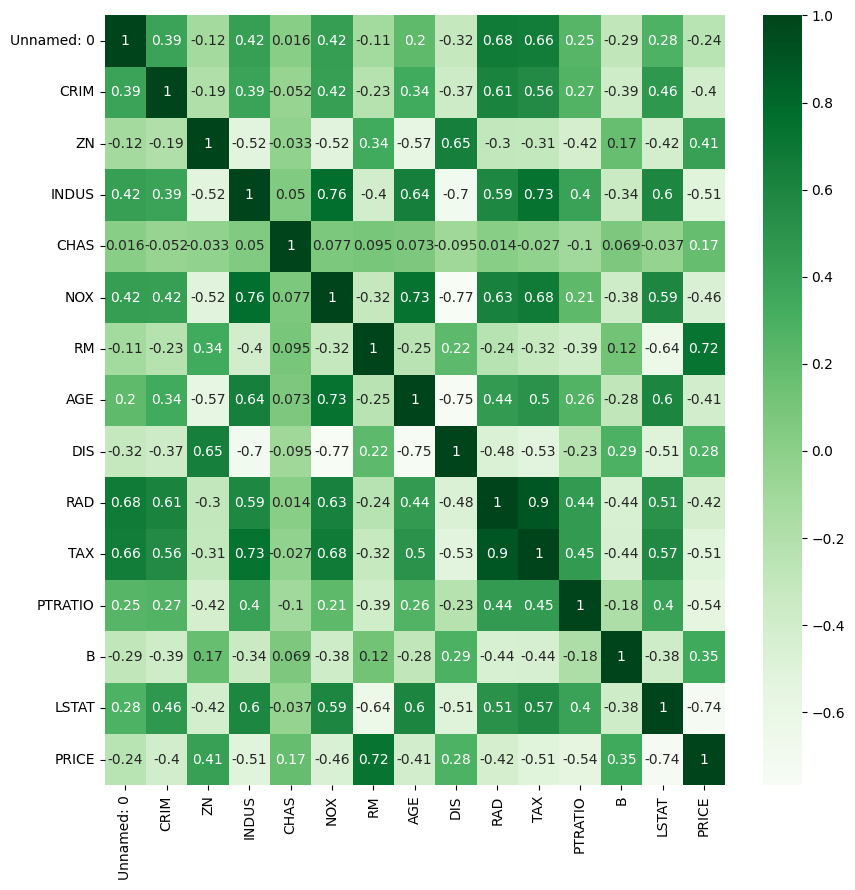

In [ ]:
#Correlation
df.corr
plt.figure(figsize=(10,10))
sns.heatmap(data= df.corr(),annot=True,cmap='Greens')

In [ ]:
#print Minimum price in PRICE column
df.PRICE.min()

5.0

In [ ]:
#print Maxmum price in PRICE column
df.PRICE.max()

50.0

In [ ]:
#Find the Standard Deviation
df.PRICE.std()

9.142979112356754


#Machine Learning - Linear Regression

In [ ]:
X =  np.array( df.drop("PRICE",axis = 1) )
y = np.array(df.PRICE)

In [ ]:
 #Splitting the data

X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Choosing the steps

model = LinearRegression()

In [ ]:
#Fitting/Train the model

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Intercept value
model.intercept_

33.90964964821505

In [ ]:
#coefficient
model.coef_

array([-1.73150175e-03, -1.12854026e-01,  4.38925567e-02,  2.65508920e-02,
        1.97766410e+00, -1.69909277e+01,  4.26753280e+00, -2.39358106e-02,
       -1.45108255e+00,  2.48730760e-01, -1.15547569e-02, -9.74790035e-01,
        9.62981128e-03, -3.90938563e-01])

In [ ]:

y_test

array([25. , 18.6, 21. , 23.5, 17.5, 33.8, 19.7, 24.8, 32. , 14. , 21.7,
       50. , 16.5, 20. , 20.6, 24.1, 19.4, 17.2, 50. , 11. , 18.2, 16.8,
       12.6, 24. , 22.6, 17.4, 22. , 30.8, 20.3, 22.6, 50. , 14.6, 50. ,
       20. , 19.5, 17.1, 17.4, 22. , 22.5, 21. , 26.6, 39.8, 23. , 29.4,
       34.6, 19.4, 24.7, 16.3, 19.2, 24.8, 20. , 19.4, 13.5, 19.1, 23.1,
       22.7, 50. , 22.4, 16.6, 21. , 21.7, 24.5, 14.9, 30.1,  7. , 31.7,
       14.9, 26.7, 23.8, 27.1, 35.4, 33.2, 16.1, 23. , 19.9, 38.7, 17.1,
       33.4, 15.2])

In [ ]:
#Prediction
y_pred = model.predict(X_test)
y_pred

array([29.5070944 , 17.25287279, 21.58145862, 30.85768014, 18.03382598,
       34.65930811, 22.25196274, 30.62074194, 33.68898673, 14.95363297,
       22.47306503, 41.20101648, 22.19752937, 16.69649928, 18.96422599,
       20.49489599, 17.38050729, 15.11063383, 22.80522056, 14.13342373,
       18.46944306, 20.00223208, 16.99521822, 29.97213477, 26.13941219,
       16.19772157, 27.21794981, 31.83901245, 22.68688486, 27.20478679,
       41.2152314 , 18.09694937, 23.19059353, 17.35934496, 17.54488923,
       20.81933074, 22.43776101, 21.92465977, 23.05503537, 21.01721051,
       27.84125904, 34.54894306, 22.1898627 , 30.96214237, 35.37170746,
       19.91141497, 25.23109995, 10.3616706 , 19.90167445, 25.31434091,
       21.76953898, 26.21260837, 14.40000022, 18.54537345, 17.96179767,
       24.39526996, 43.53260967, 22.82302111, 15.53210904, 23.47664095,
       21.34398636, 21.3769197 , 14.58666788, 28.89692803, -3.80232402,
       32.57217234, 16.77231145, 31.86609769, 24.56776894, 20.30

In [ ]:
#Testing the model performance
model.score(X_test,y_test)

0.6273257078157146

In [ ]:
r2_score(y_test,y_pred)

0.6273257078157146

Text(0.5, 0, 'Actual Price')
Text(0, 0.5, 'Predicted Price')
Text(0.5, 1.0, 'Actual Price v/s Predicted Price')


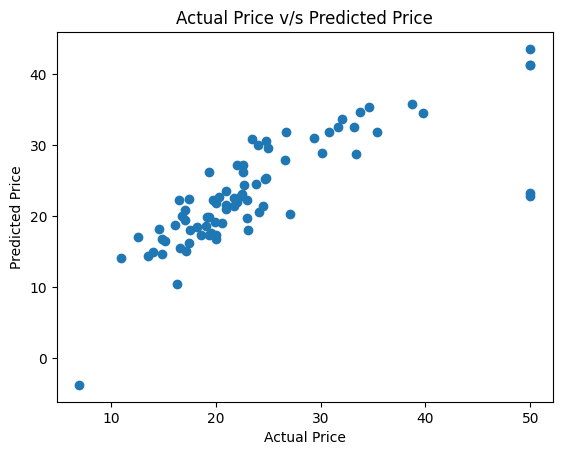

In [ ]:
print(plt.scatter(y_test,y_pred))
print(plt.xlabel("Actual Price"))
print(plt.ylabel("Predicted Price"))
print(plt.title("Actual Price v/s Predicted Price"))

Conclusion:The accuracy score or the model score of boston House Price prediction is 0.6273257078157146 (62%)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')